[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ghulom97/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Detected encoding: utf-8
First 10 tokens: ['Goals', '!', 'How', 'to', 'Get', 'Everything', 'You', 'Want', '—', 'Faster']
[('goals', 774), ('page', 437), ('manuscript', 433), ('life', 382), ('time', 323), ('people', 300), ('goal', 292), ('one', 289), ('every', 249), ('make', 204)]


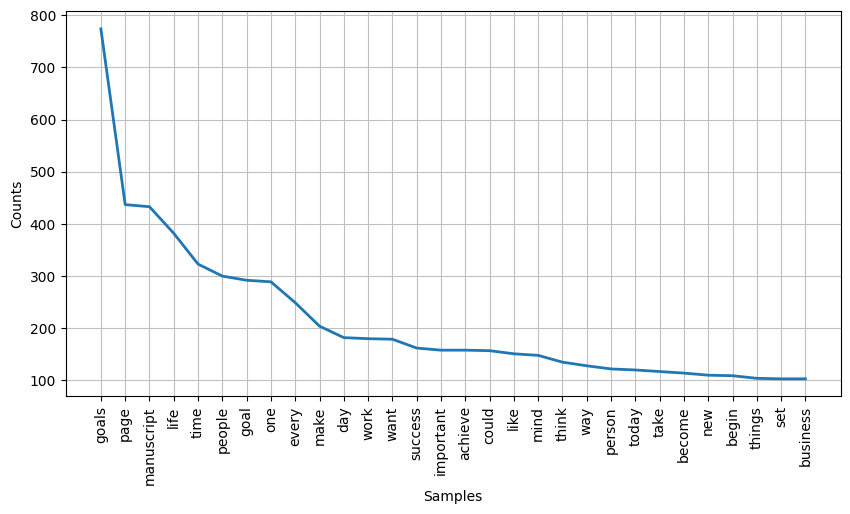

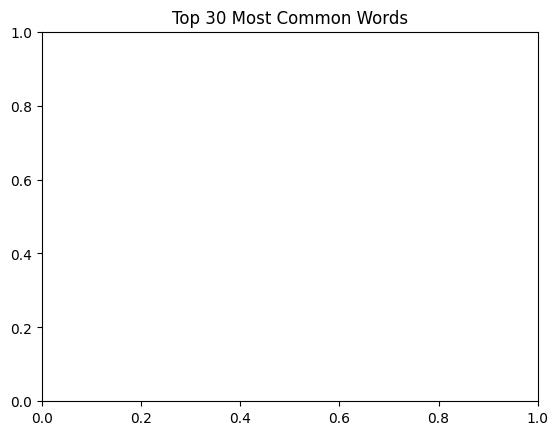

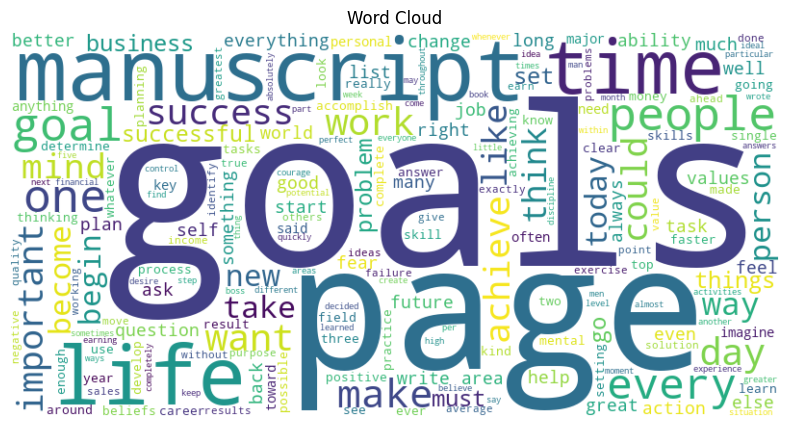

In [12]:
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import chardet

# NLTK 패키지 다운로드 (처음 한 번만 실행)
nltk.download('stopwords')

# 파일 인코딩 자동 감지 및 파일 읽기
file_path = "/Users/ghulom97/Downloads/Brian-Tracy-Goals.txt"

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f"Detected encoding: {encoding}")

with open(file_path, encoding=encoding) as file:
    text = file.read()

# WordPunctTokenizer를 사용하여 단어 토큰화
tokenizer = WordPunctTokenizer()
tokens = tokenizer.tokenize(text)
print(f"First 10 tokens: {tokens[:10]}")

# 불용어 제거하기
stop_words = set(stopwords.words('english'))
tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# 사용자 생성 불용어 사전 로드 및 불용어 제거
stopword_path = "/Users/ghulom97/Downloads/001/download_data/실습용파일/steve_stopword_list.txt"

with open(stopword_path, encoding='utf-8') as f:
    custom_stopwords = set(f.read().split())

tokens = [word for word in tokens if word.lower() not in custom_stopwords]
tokens = [word for word in tokens if 2 <= len(word) <= 10]

# 단어별 언급 빈도 조사
fdist = FreqDist(tokens)

# 가장 자주 사용된 단어 10개 보기
print(fdist.most_common(10))

# 단어 빈도 막대 그래프
plt.figure(figsize=(10, 5))
fdist.plot(30, cumulative=False)
plt.title('Top 30 Most Common Words')
plt.show()

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()
